In [45]:
!pip uninstall nnetsauce --yes

Found existing installation: nnetsauce 0.12.2
Uninstalling nnetsauce-0.12.2:
  Successfully uninstalled nnetsauce-0.12.2


In [46]:
!pip install git+https://github.com/Techtonique/nnetsauce.git@check-simulations-base

  Cloning https://github.com/Techtonique/nnetsauce.git (to revision check-simulations-base) to /tmp/pip-req-build-e45zf51y
  Running command git clone --filter=blob:none --quiet https://github.com/Techtonique/nnetsauce.git /tmp/pip-req-build-e45zf51y
  Running command git checkout -b check-simulations-base --track origin/check-simulations-base
  Switched to a new branch 'check-simulations-base'
  Branch 'check-simulations-base' set up to track remote branch 'check-simulations-base' from 'origin'.
  Resolved https://github.com/Techtonique/nnetsauce.git to commit 65e62875bb8f2d42cd2fc25d76258bdf9a526fb7
  Preparing metadata (setup.py) ... done
  Created wheel for nnetsauce: filename=nnetsauce-0.12.2-py2.py3-none-any.whl size=110309 sha256=c22682dd221a9f8e64462ff9f113bc2b063d9edda26caf6a87458ed63135a0d5
  Stored in directory: /tmp/pip-ephem-wheel-cache-fy6lxxfz/wheels/4d/fd/5a/c030be05599fbfefc9b49cc7d73c63bb1ba233420a1594a1e7
Successfully built nnetsauce


In [47]:
#!pip install nnetsauce

# `AdaBoostClassifier`

In [48]:
import nnetsauce as ns
import numpy as np
from sklearn.datasets import load_breast_cancer, load_wine, load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from time import time


# dataset no. 1 ----------

print(" \n breast cancer dataset ----- \n")

# logistic reg
breast_cancer = load_breast_cancer()
Z = breast_cancer.data
t = breast_cancer.target
np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(Z, t, test_size=0.2)

# SAMME.R
clf = LogisticRegression(solver='liblinear', multi_class = 'ovr',
                         random_state=123)
fit_obj = ns.AdaBoostClassifier(clf,
                                n_hidden_features=int(11.22338867),
                                direct_link=True,
                                n_estimators=250, learning_rate=0.01126343,
                                col_sample=0.72684326, row_sample=0.86429443,
                                dropout=0.63078613, n_clusters=2,
                                type_clust="gmm",
                                verbose=1, seed = 123,
                                method="SAMME.R")
start = time()
fit_obj.fit(X_train, y_train)
print(f"Elapsed {time() - start}")

start = time()
print(fit_obj.score(X_test, y_test))
print(f"Elapsed {time() - start}")

preds = fit_obj.predict(X_test)

print(fit_obj.score(X_test, y_test, scoring="roc_auc"))
print(metrics.classification_report(preds, y_test))


# dataset no. 2 ----------

print(" \n wine dataset ----- \n")

wine = load_wine()
Z = wine.data
t = wine.target
np.random.seed(123)
Z_train, Z_test, y_train, y_test = train_test_split(Z, t, test_size=0.2)


# SAMME
clf = LogisticRegression(solver='liblinear', multi_class = 'ovr',
                         random_state=123)
fit_obj = ns.AdaBoostClassifier(clf,
                                n_hidden_features=int(8.21154785e+01),
                                direct_link=True,
                                n_estimators=1000, learning_rate=2.96252441e-02,
                                col_sample=4.22766113e-01, row_sample=7.87268066e-01,
                                dropout=1.56909180e-01, n_clusters=3,
                                type_clust="gmm",
                                verbose=1, seed = 123,
                                method="SAMME")
start = time()
fit_obj.fit(Z_train, y_train)
print(f"Elapsed {time() - start}")
start = time()
print(fit_obj.score(Z_test, y_test))
print(f"Elapsed {time() - start}")
preds = fit_obj.predict(Z_test)
print(metrics.classification_report(preds, y_test))


# dataset no. 3 ----------

print(" \n iris dataset ----- \n")

iris = load_iris()
Z = iris.data
t = iris.target
np.random.seed(123)
Z_train, Z_test, y_train, y_test = train_test_split(Z, t, test_size=0.2)


# SAMME.R
clf = LogisticRegression(solver='liblinear', multi_class = 'ovr',
                         random_state=123)
fit_obj = ns.AdaBoostClassifier(clf,
                                n_hidden_features=int(19.66918945),
                                direct_link=True,
                                n_estimators=250, learning_rate=0.28534302,
                                col_sample=0.45474854, row_sample=0.87833252,
                                dropout=0.15603027, n_clusters=0,
                                verbose=1, seed = 123,
                                method="SAMME.R")
start = time()
fit_obj.fit(Z_train, y_train)
print(f"Elapsed {time() - start}")
start = time()
print(fit_obj.score(Z_test, y_test))
print(f"Elapsed {time() - start}")
preds = fit_obj.predict(Z_test)
print(metrics.classification_report(preds, y_test))


 
 breast cancer dataset ----- 

250/250 [██████████████████████████████] - 40s 159ms/step
Elapsed 39.76691818237305
0.9736842105263158
Elapsed 0.637819766998291
0.9634146341463415
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        38
           1       1.00      0.96      0.98        76

    accuracy                           0.97       114
   macro avg       0.96      0.98      0.97       114
weighted avg       0.98      0.97      0.97       114

 
 wine dataset ----- 

1000/1000 [██████████████████████████████] - 75s 75ms/step
Elapsed 74.8521659374237
0.9722222222222222
Elapsed 0.8341071605682373
              precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       0.91      1.00      0.95        10
           2       1.00      1.00      1.00        17

    accuracy                           0.97        36
   macro avg       0.97      0.96      0.96        36
weighted avg

# `RandomForestClassifier`

In [49]:

import nnetsauce as ns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from time import time



digits = load_digits()
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=123)


# layer 1 (base layer) ----
print(" \n layer 1 ----- \n")
layer1_regr = RandomForestClassifier(n_estimators=10, random_state=123)

start = time()

layer1_regr.fit(X_train, y_train)

# Accuracy in layer 1
print(layer1_regr.score(X_test, y_test))


# layer 2 using layer 1 ----
print(" \n layer 2 ----- \n")
layer2_regr = ns.CustomClassifier(obj = layer1_regr, n_hidden_features=5,
                        direct_link=True, bias=True,
                        nodes_sim='uniform', activation_name='relu',
                        n_clusters=2, seed=123)
layer2_regr.fit(X_train, y_train)

# Accuracy in layer 2
print(layer2_regr.score(X_test, y_test))


# layer 3 using layer 2 ----
print(" \n layer 3 ----- \n")
layer3_regr = ns.CustomClassifier(obj = layer2_regr, n_hidden_features=10,
                        direct_link=True, bias=True, dropout=0.7,
                        nodes_sim='uniform', activation_name='relu',
                        n_clusters=2, seed=123)
layer3_regr.fit(X_train, y_train)

# Accuracy in layer 3
print(layer3_regr.score(X_test, y_test))

print(f"Elapsed {time() - start}")

 
 layer 1 ----- 

0.9388888888888889
 
 layer 2 ----- 

0.9416666666666667
 
 layer 3 ----- 

0.9444444444444444
Elapsed 2.3633923530578613


# `GLMClassifier`

In [50]:
import nnetsauce as ns
import numpy as np
from sklearn.datasets import load_breast_cancer, load_wine, load_iris, make_classification
from sklearn.model_selection import train_test_split
from sklearn import metrics
from time import time
import matplotlib.pyplot as plt


print(f"\n method = 'momentum' ----------")


# dataset no. 1 ----------

breast_cancer = load_breast_cancer()
Z = breast_cancer.data
t = breast_cancer.target
np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(Z, t, test_size=0.2)

print(f"\n 1 - breast_cancer dataset ----------")
fit_obj = ns.GLMClassifier(n_hidden_features=5,
                           n_clusters=2, type_clust="gmm")

start = time()
fit_obj.fit(X_train, y_train, verbose=0)
print(time() - start)

# plt.plot(fit_obj.optimizer.results[2])

print(fit_obj.score(X_test, y_test))
print(fit_obj.score(X_test, y_test, scoring="roc_auc"))

start = time()
preds = fit_obj.predict(X_test)
print(time() - start)
print(metrics.classification_report(preds, y_test))


# dataset no. 2 ----------

wine = load_wine()
Z = wine.data
t = wine.target
np.random.seed(123575)
X_train, X_test, y_train, y_test = train_test_split(Z, t, test_size=0.2)

print(f"\n 2 - wine dataset ----------")
fit_obj = ns.GLMClassifier(n_hidden_features=3,
                           n_clusters=2, type_clust="gmm")

start = time()
fit_obj.fit(X_train, y_train, verbose=0)
print(time() - start)

# plt.plot(fit_obj.optimizer.results[2])

print(fit_obj.score(X_test, y_test))

start = time()
preds = fit_obj.predict(X_test)
print(time() - start)
print(metrics.classification_report(preds, y_test))

print(f"\n method = 'exp' ----------")

# dataset no. 1 ----------

breast_cancer = load_breast_cancer()
Z = breast_cancer.data
t = breast_cancer.target
X_train, X_test, y_train, y_test = train_test_split(Z, t, test_size=0.2, random_state=123)

print(f"\n 1 - breast_cancer dataset ----------")
opt = ns.Optimizer()
opt.learning_method = "exp"
fit_obj = ns.GLMClassifier(optimizer=opt)
fit_obj.lambda1=1e-5
fit_obj.lambda2=100
fit_obj.optimizer.type_optim = "scd"
fit_obj.optimizer.verbose=0
fit_obj.optimizer.learning_rate=0.01
fit_obj.optimizer.batch_prop=0.5

start = time()
fit_obj.fit(X_train, y_train)
print(time() - start)

# plt.plot(fit_obj.optimizer.results[2])

print(fit_obj.score(X_test, y_test))
print(fit_obj.score(X_test, y_test, scoring="roc_auc"))

start = time()
preds = fit_obj.predict(X_test)
print(time() - start)
print(metrics.classification_report(preds, y_test))


print(f"\n method = 'poly' ----------")

# dataset no. 1 ----------

print(f"\n 1 - breast_cancer dataset ----------")
opt = ns.Optimizer()
opt.learning_method = "poly"
fit_obj = ns.GLMClassifier(optimizer=opt)
fit_obj.lambda1=1
fit_obj.lambda2=1
fit_obj.optimizer.type_optim = "scd"
fit_obj.optimizer.verbose=0
fit_obj.optimizer.learning_rate=0.001
fit_obj.optimizer.batch_prop=0.5

start = time()
fit_obj.fit(X_train, y_train)
print(time() - start)

# plt.plot(fit_obj.optimizer.results[2])

print(fit_obj.score(X_test, y_test))
print(fit_obj.score(X_test, y_test, scoring="roc_auc"))

start = time()
preds = fit_obj.predict(X_test)
print(time() - start)
print(metrics.classification_report(preds, y_test))



# dataset no. 3 ----------

iris = load_iris()
Z = iris.data
t = iris.target
X_train, X_test, y_train, y_test = train_test_split(Z, t, test_size=0.2, stratify=t, random_state=123)

print(f"\n 3 - iris dataset ----------")
fit_obj = ns.GLMClassifier(n_hidden_features=3,
                           n_clusters=3, type_clust="gmm")

start = time()
fit_obj.fit(X_train, y_train)
print(time() - start)

# plt.plot(fit_obj.optimizer.results[2])

print(fit_obj.score(X_test, y_test))

start = time()
preds = fit_obj.predict(X_test)
print(time() - start)
print(metrics.classification_report(preds, y_test))

# dataset no. 4 ----------

X, y = make_classification(n_samples=2500, n_features=20,
                                               random_state=783451)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,
                                                    random_state=35145)

print(f"\n 4 - make_classification dataset ----------")
fit_obj = ns.GLMClassifier(n_hidden_features=5,
                                  dropout=0.1, n_clusters=0)

start = time()
fit_obj.fit(X_train, y_train)
print(time() - start)

print(fit_obj.score(X_test, y_test))

preds = fit_obj.predict(X_test)
print(metrics.classification_report(preds, y_test))


 method = 'momentum' ----------

 1 - breast_cancer dataset ----------


 10%|█         | 10/100 [00:00<00:05, 17.55it/s]


0.7183616161346436
0.9912280701754386
0.9878048780487805
0.0014624595642089844
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        40
           1       1.00      0.99      0.99        74

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114


 2 - wine dataset ----------


 25%|██▌       | 25/100 [00:00<00:02, 30.62it/s]


0.9023666381835938
0.9166666666666666
0.0012316703796386719
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        15
           1       0.81      1.00      0.90        13
           2       1.00      1.00      1.00         8

    accuracy                           0.92        36
   macro avg       0.94      0.93      0.93        36
weighted avg       0.93      0.92      0.92        36


 method = 'exp' ----------

 1 - breast_cancer dataset ----------
2.188493490219116
0.9649122807017544
0.951219512195122
0.0018305778503417969
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        37
           1       1.00      0.95      0.97        77

    accuracy                           0.96       114
   macro avg       0.95      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114


 method = 'poly' ----------

 1 - breast_cancer dataset ----------
5.4542248249053955
0

 48%|████▊     | 48/100 [00:01<00:01, 40.17it/s]


1.3026702404022217
0.9
0.004840373992919922
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.70      1.00      0.82         7
           2       1.00      0.77      0.87        13

    accuracy                           0.90        30
   macro avg       0.90      0.92      0.90        30
weighted avg       0.93      0.90      0.90        30


 4 - make_classification dataset ----------


 20%|██        | 20/100 [00:02<00:10,  7.79it/s]

2.613776445388794
0.878
              precision    recall  f1-score   support

           0       0.86      0.89      0.88       241
           1       0.90      0.86      0.88       259

    accuracy                           0.88       500
   macro avg       0.88      0.88      0.88       500
weighted avg       0.88      0.88      0.88       500



# `GLMRegressor`

In [51]:
import numpy as np
import nnetsauce as ns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from time import time
import matplotlib.pyplot as plt


diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2020)



 Example 1 -----

 Elapsed: 2.241529703140259
[ -1.92967688 -18.67957657  24.80493492   5.68359445 -37.59910809
  21.45994843   2.2256836    3.94589241  34.25886238  -0.60402811
   5.13947017  -5.13958388  61.7784617  -29.68024331 -15.38822172]
RMSE: 
55.78987725321281


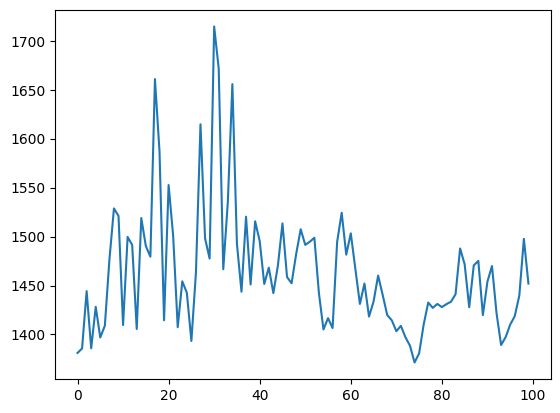

In [52]:
print(f"\n Example 1 -----")
opt = ns.Optimizer(type_optim="sgd",
                    learning_rate=0.1,
                    batch_prop=0.25,
                    verbose=0)
obj = ns.GLMRegressor(n_hidden_features=3,
                       lambda1=1e-2, alpha1=0.5,
                       lambda2=1e-2, alpha2=0.5,
                       optimizer=opt)

start = time()
obj.fit(X_train, y_train)
print(f"\n Elapsed: {time() - start}")
plt.plot(obj.optimizer.results[2])
print(obj.beta_)
print("RMSE: ")
print(np.sqrt(obj.score(X_test, y_test))) # RMSE





 Example 2 -----


100%|██████████| 100/100 [00:01<00:00, 93.35it/s]



 Elapsed: 1.5752556324005127
[ -5.17037121 -11.02812305  22.83103508   8.62325592 -62.39389632
  35.3695671   10.44574012   4.66702385  42.36434127  -0.74256347
   1.11210714  -1.12155835  74.34729599 -46.36848233 -28.42432107
   9.60006461   8.67631018]
RMSE: 
55.48563638940492

 Example 3 -----


100%|██████████| 100/100 [00:00<00:00, 100.12it/s]



 Elapsed: 1.2611901760101318
[ -6.00614987 -11.25958546  25.23688889  10.13324024 -59.18337206
  34.5291786   11.0443516    5.12718727  40.86616465  -2.0125757
   2.62195963  -2.59254866  70.32721959 -43.16316948 -25.85745012
   9.96210451   7.3259797 ]
RMSE: 
55.48563638940492


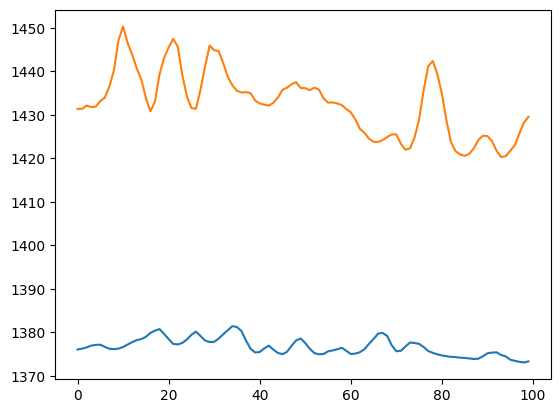

In [53]:
print(f"\n Example 2 -----")
opt2 = ns.Optimizer(type_optim="scd",
                    learning_rate=0.01,
                    batch_prop=0.8,
                    verbose=1)
obj2 = ns.GLMRegressor(n_hidden_features=5,
                       lambda1=1e-2, alpha1=0.5,
                       lambda2=1e-2, alpha2=0.5,
                       optimizer=opt2)

start = time()
obj2.fit(X_train, y_train)
print(f"\n Elapsed: {time() - start}")
plt.plot(obj2.optimizer.results[2])
print(obj2.beta_)
print("RMSE: ")
print(np.sqrt(obj2.score(X_test, y_test))) # RMSE

print(f"\n Example 3 -----")

opt3 = ns.Optimizer(type_optim="scd",
                    batch_prop=0.25,
                    verbose=1)
obj3 = ns.GLMRegressor(n_hidden_features=5,
                       lambda1=1e-2, alpha1=0.1,
                       lambda2=1e-1, alpha2=0.9,
                       optimizer=opt3)
start = time()
obj3.fit(X_train, y_train)
print(f"\n Elapsed: {time() - start}")
plt.plot(obj3.optimizer.results[2])
print(obj3.beta_)
print("RMSE: ")
print(np.sqrt(obj2.score(X_test, y_test))) # RMSE




 Example 4 -----

 Elapsed: 1.0440740585327148
[ -5.17037121 -11.02812305  22.83103508   8.62325592 -62.39389632
  35.3695671   10.44574012   4.66702385  42.36434127  -0.74256347
   1.11210714  -1.12155835  74.34729599 -46.36848233 -28.42432107
   9.60006461   8.67631018]
RMSE: 
55.48563638940492


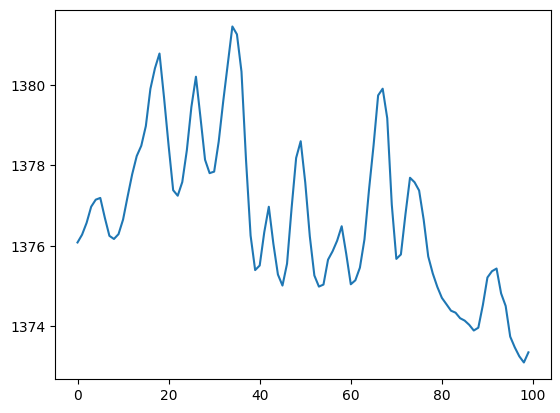

In [54]:
print(f"\n Example 4 -----")

opt4 = ns.Optimizer(type_optim="scd",
                    learning_rate=0.01,
                    batch_prop=0.8,
                    verbose=0)
obj4 = ns.GLMRegressor(optimizer=opt4)

start = time()
obj4.fit(X_train, y_train)
print(f"\n Elapsed: {time() - start}")
plt.plot(obj4.optimizer.results[2])
print(obj4.beta_)
print("RMSE: ")
print(np.sqrt(obj4.score(X_test, y_test))) # RMSE




 Example 5 -----

 Elapsed: 1.149055004119873
[ -3.9623054   -8.83444838  11.28031821   6.51815413  -4.37186235
 -10.13442497  -6.8943376   -1.98477363  14.40129175   0.54963474
   1.91475518  -1.78652545  20.61969932  -7.9036097   -7.99513317
   1.10895746  24.26166607]
RMSE: 
56.47382384923499


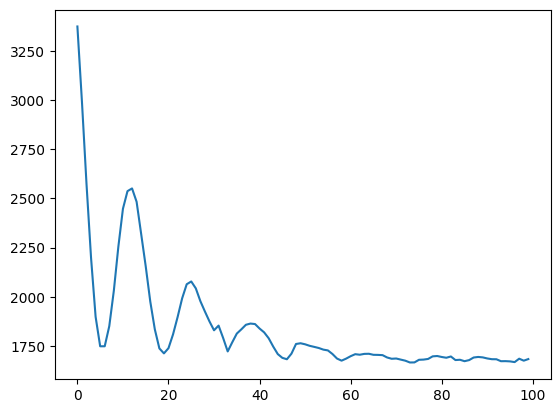

In [55]:
print(f"\n Example 5 -----")

opt5 = ns.Optimizer(type_optim="scd",
                    learning_rate=0.1,
                    batch_prop=0.5,
                    verbose=0)
obj5 = ns.GLMRegressor(optimizer=opt5,
                       lambda1=1,
                       alpha1=0.5,
                       lambda2=1e-2,
                       alpha2=0.1)

start = time()
obj5.fit(X_train, y_train)
print(f"\n Elapsed: {time() - start}")
plt.plot(obj5.optimizer.results[2])
print(obj5.beta_)
print("RMSE: ")
print(np.sqrt(obj5.score(X_test, y_test))) # RMSE

# `MultitaskClassifier`

In [56]:
import nnetsauce as ns
import numpy as np
from sklearn.datasets import load_breast_cancer, load_wine, load_digits, load_iris, make_classification
from sklearn.linear_model import ElasticNet, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from time import time


# dataset no. 1 ----------

print(" \n breast cancer dataset ----- \n")

breast_cancer = load_breast_cancer()
Z = breast_cancer.data
t = breast_cancer.target

X_train, X_test, y_train, y_test = train_test_split(Z, t, test_size=0.2,
                                                    random_state=123+2*10)

# Linear Regression is used
regr = LinearRegression()
fit_obj = ns.MultitaskClassifier(regr, n_hidden_features=5,
                             n_clusters=2, type_clust="gmm")

start = time()
fit_obj.fit(X_train, y_train)
print(f"Elapsed {time() - start}")

print(fit_obj.score(X_test, y_test))
print(fit_obj.score(X_test, y_test, scoring="roc_auc"))

start = time()
preds = fit_obj.predict(X_test)
print(f"Elapsed {time() - start}")
print(metrics.classification_report(preds, y_test))

# dataset no. 4 ----------

print(" \n wine dataset ----- \n")

dataset = load_wine()
Z = dataset.data
t = dataset.target
#np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(Z, t, test_size=0.2,
                                                    random_state=123+2*10)

# Linear Regression is used
regr = LinearRegression()
fit_obj = ns.MultitaskClassifier(regr, n_hidden_features=5,
                                 n_clusters=2)

start = time()
fit_obj.fit(X_train, y_train)
print(f"Elapsed {time() - start}")

print(fit_obj.score(X_test, y_test))

start = time()
preds = fit_obj.predict(X_test)
print(f"Elapsed {time() - start}")
print(metrics.classification_report(preds, y_test))

# dataset no. 3 ----------

print(" \n iris dataset ----- \n")

dataset = load_iris()
Z = dataset.data
t = dataset.target
#np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(Z, t, test_size=0.2,
                                                    random_state=123+2*10)

# Linear Regression is used
regr = LinearRegression()
fit_obj = ns.MultitaskClassifier(regr, n_hidden_features=5,
                                 n_clusters=2, type_clust="gmm")

start = time()
fit_obj.fit(X_train, y_train)
print(f"Elapsed {time() - start}")

print(fit_obj.score(X_test, y_test))

start = time()
preds = fit_obj.predict(X_test)
print(f"Elapsed {time() - start}")
print(metrics.classification_report(preds, y_test))

# dataset no. 2 ----------

print(" \n digits dataset ----- \n")

dataset = load_digits()
Z = dataset.data
t = dataset.target
#np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(Z, t, test_size=0.2,
                                                    random_state=123+2*10)

# Linear Regression is used
regr = LinearRegression()
fit_obj = ns.MultitaskClassifier(regr, n_hidden_features=5,
                                 n_clusters=2, type_clust="gmm")

start = time()
fit_obj.fit(X_train, y_train)
print(f"Elapsed {time() - start}")

print(fit_obj.score(X_test, y_test))

start = time()
preds = fit_obj.predict(X_test)
print(f"Elapsed {time() - start}")
print(metrics.classification_report(preds, y_test))

 
 breast cancer dataset ----- 

Elapsed 0.4237709045410156
0.9473684210526315
0.9540687160940327
Elapsed 0.009024620056152344
              precision    recall  f1-score   support

           0       0.97      0.87      0.92        39
           1       0.94      0.99      0.96        75

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114

 
 wine dataset ----- 

Elapsed 0.08051538467407227
0.9722222222222222
Elapsed 0.0019588470458984375
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        36
   macro avg       0.97      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36

 
 iris dataset ----- 

Elapsed 0.039641618728637695
1.0
Elapsed

# `MTS`

In [57]:
import nnetsauce as ns
import numpy as np
import pandas as pd
from sklearn import datasets, metrics
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
np.random.seed(1235)


M = np.random.rand(10, 3)
M[:,0] = 10*M[:,0]
M[:,2] = 25*M[:,2]

print(M)
print("\n")

# Adjust Bayesian Ridge
regr4 = linear_model.BayesianRidge()
obj_MTS = ns.MTS(regr4, lags = 1, n_hidden_features=5)
obj_MTS.fit(M)
print(obj_MTS.df_)
print(obj_MTS.residuals_)
print(obj_MTS.predict(return_std=True))

# with credible intervals
print(obj_MTS.predict(return_std=True, level=80))
print("\n")

print(obj_MTS.predict(return_std=True, level=95))
print("\n")

# example with dataframes (#1)
print("examples with dataframes ----- \n")

print("example 1 with dataframes ----- \n")

dataset = {
    'date' : ['2001-01-01', '2002-01-01', '2003-01-01', '2004-01-01', '2005-01-01'],
    'series1' : [34, 30, 35.6, 33.3, 38.1],
    'series2' : [4, 5.5, 5.6, 6.3, 5.1],
    'series3' : [100, 100.5, 100.6, 100.2, 100.1]}
df = pd.DataFrame(dataset).set_index('date')
print(df.shape)
print(df.values)
print(df)

regr5 = linear_model.BayesianRidge()
obj_MTS = ns.MTS(regr5, lags = 1, n_hidden_features=5)
obj_MTS.fit(df)
print(obj_MTS.predict())
print("\n")
print(obj_MTS.predict(return_std=True))

# example with dataframes (#2)

print("\n")
print("example 2 with dataframes ----- \n")

# Data frame containing the time series
dataset = {
'date' : ['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04', '2020-01-05'],
'value' : [34, 30, 35.6, 33.3, 38.1]}

df = pd.DataFrame(dataset).set_index('date')
print(df.shape)
print(df.values)
print(df)

regr6 = linear_model.BayesianRidge()
obj_MTS = ns.MTS(regr6, lags = 1, n_hidden_features=5)
obj_MTS.fit(df)
print(obj_MTS.predict())
print("\n")
print(obj_MTS.predict(return_std=True))


obj_MTS = ns.MTS(RandomForestRegressor(), lags = 1, n_hidden_features=5)
obj_MTS.fit(df)
print(obj_MTS.predict())
print("\n")
print("\n")
print("example 3 with dataframes ----- \n")

dataset = {
'date' : ['2001-01-01', '2002-01-01', '2003-01-01', '2004-01-01', '2005-01-01'],
'series1' : [34, 30, 35.6, 33.3, 38.1],
'series2' : [4, 5.5, 5.6, 6.3, 5.1],
'series3' : [100, 100.5, 100.6, 100.2, 100.1]}
df = pd.DataFrame(dataset).set_index('date')
print(df)
print(df.columns)

# Adjust Bayesian Ridge
regr5 = linear_model.BayesianRidge()
obj_MTS = ns.MTS(regr5, lags = 2, n_hidden_features=5, n_clusters=3)
obj_MTS.fit(df)
print(obj_MTS.predict())
# with credible intervals
print(obj_MTS.predict(return_std=True, level=80))
print(obj_MTS.predict(return_std=True, level=95))
print(obj_MTS.predict())
print("\n")
print("example 4 with xreg ----- \n")

np.random.seed(123)
X = np.random.rand(25, 3)
X[:, 0] = 100 * X[:, 0]
X[:, 2] = 25 * X[:, 2]

index_train = range(20)
index_test = range(20, 25)

X_train = X[index_train, :]
X_test = X[index_test, :]

Xreg_train = np.reshape(range(0, 60), (20, 3))
Xreg_test = np.reshape(range(60, 75), (5, 3))

regr = linear_model.BayesianRidge()
fit_obj = ns.MTS(
            regr,
            n_hidden_features=10,
            direct_link=True,
            nodes_sim="sobol",
            activation_name="relu",
            n_clusters=2,
        )

fit_obj.fit(X_train, xreg=Xreg_train)
err_xreg = fit_obj.predict(new_xreg=Xreg_test) - X_test
print("err_xreg")
print(err_xreg)
print("\n")
rmse_xreg = np.sqrt(np.mean(err_xreg ** 2))
print("err_xreg")
print(rmse_xreg)
print("\n")

print("example 5 with dataframes and xreg ----- \n")

dataset = {
'date' : ['2001-01-01', '2002-01-01', '2003-01-01', '2004-01-01', '2005-01-01'],
'series1' : [34, 30, 35.6, 33.3, 38.1],
'series2' : [4, 5.5, 5.6, 6.3, 5.1],
'series3' : [100, 100.5, 100.6, 100.2, 100.1]}
df = pd.DataFrame(dataset).set_index('date')
print(df)

Xreg_train = pd.DataFrame(np.random.rand(5, 3))
Xreg_test = pd.DataFrame(np.random.rand(5, 3))
print("Xreg_train")
print(Xreg_train)
print("Xreg_test")
print(Xreg_test)

# Adjust Bayesian Ridge with external regressors
regr5 = linear_model.BayesianRidge()
obj_MTS = ns.MTS(regr5, lags = 2, n_hidden_features=5, n_clusters=2)

#obj_MTS.fit(df)
#print(obj_MTS.predict())
# with credible intervals
#print(obj_MTS.predict(return_std=True, level=95))

obj_MTS.fit(df, xreg=Xreg_train)
print(obj_MTS.predict(new_xreg=Xreg_test, return_std=True))

[[ 9.53762582  0.99212647 11.99007311]
 [ 9.43406859  0.74877503 20.99949871]
 [ 2.42229355  0.36597918  9.29986516]
 [ 6.52886047  0.71176244 19.3546736 ]
 [ 4.54121809  0.93885435 23.93548749]
 [ 2.25561437  0.44132418  4.41335511]
 [ 8.12910899  0.80827968 15.99358402]
 [ 7.49476645  0.92685265  4.35275113]
 [ 8.19000539  0.21873305 24.04374296]
 [ 1.67107715  0.69280071  2.81332169]]


None
[[-1.26092012e-01 -1.56793239e-03 -9.37344780e+00]
 [-9.02849138e-01 -4.34783316e-03  8.59908410e+00]
 [ 1.67614524e+00  3.92308478e-02 -9.20340639e+00]
 [ 4.32830610e-01  2.69228775e-03  2.49851173e-01]
 [-1.18063702e+00  1.76066210e-04 -8.97837272e+00]
 [ 2.04778077e-01 -1.54971650e-02  1.04160296e+01]
 [-1.58742633e-01 -2.54987638e-03  3.96867862e+00]
 [-1.60241035e+00 -5.25550629e-03 -2.90537743e+00]
 [ 1.65697722e+00 -1.28808885e-02  7.22696080e+00]]
DescribeResult(mean=array([[ 8.09550765,  0.83341726, 16.02471383],
       [ 5.88482327,  0.84865585, 13.56168825],
       [ 6.37886598,  0.85

# `MTS` 2

In [58]:
import nnetsauce as ns
import numpy as np
import pandas as pd
from scipy import stats
from sklearn import datasets, metrics
from sklearn import linear_model
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import RandomForestRegressor
from statsmodels.stats.diagnostic import acorr_ljungbox
from time import time

np.random.seed(1235)

url = "https://raw.githubusercontent.com/selva86/datasets/master/Raotbl6.csv"
#url = "/Users/t/Documents/datasets/time_series/multivariate/Raotbl6.csv"

df = pd.read_csv(url)

df.set_index('date', inplace=True)

print(df.shape)
df_train = df.iloc[0:97,]
df_test = df.iloc[97:123,]
# print(df_train.head())
print(df_train.tail())
print(df_test.head())
# print(df_test.tail())

regr = linear_model.BayesianRidge()
obj_MTS = ns.MTS(regr, lags = 1, n_hidden_features=5)
obj_MTS.fit(df_train.values)
print("\n")
print(obj_MTS.predict(h=5, return_std=True))
# print(f" stats.describe(obj_MTS.residuals_, axis=0, bias=False) \n {stats.describe(obj_MTS.residuals_, axis=0, bias=False)} ")
# print([acorr_ljungbox(obj_MTS.residuals_[:,i], boxpierce=True, auto_lag=True, return_df=True) for i in range(obj_MTS.residuals_.shape[1])])

regr2 = linear_model.ARDRegression()
obj_MTS2 = ns.MTS(regr2, lags = 1, n_hidden_features=5, replications=10, kernel='gaussian', seed=2324)
start = time()
obj_MTS2.fit(df_train.values)
print(f"Elapsed {time()-start} s")
print("\n\n")
print(obj_MTS2.get_params())
print("\n\n")
print(obj_MTS2.kde_)
print("\n\n")
print(obj_MTS2.predict(h=5, return_std=True))
print("\n\n")
print(f"------- obj_MTS2.residuals_: {obj_MTS2.residuals_}")
print("\n\n")
print(f"------- obj_MTS2.residuals_sims_[0].shape: {obj_MTS2.residuals_sims_[0].shape}")
print("\n\n")
print(f"------- obj_MTS2.residuals_sims_[0]: {obj_MTS2.residuals_sims_[0]}")
print("\n\n")
print(f"------- obj_MTS2.residuals_sims_[0]: {obj_MTS2.residuals_sims_[0].shape}")
print("\n\n")
print(f" stats.describe(obj_MTS2.residuals_, axis=0, bias=False) \n {stats.describe(obj_MTS.residuals_, axis=0, bias=False)} ")
print("\n\n")

# print(obj_MTS2.residuals_sims_.shape)
# print("\n\n")
# print(stats.describe(obj_MTS2.residuals_[:,0], bias=False))
# print("\n\n")
# print(stats.describe(obj_MTS2.residuals_sims_[:,0], bias=False))
# print("\n\n")
# histogram_residuals = np.histogram(obj_MTS2.residuals_[:,0])
# print(histogram_residuals)
# print("\n\n")
# print(np.histogram(obj_MTS2.residuals_sims_[:,0], bins=histogram_residuals[1]))
# print(f" stats.describe(obj_MTS2.residuals_, axis=0, bias=False) \n {stats.describe(obj_MTS2.residuals_, axis=0, bias=False)} ")
# print([acorr_ljungbox(obj_MTS2.residuals_[:,i], boxpierce=True, auto_lag=True, return_df=True) for i in range(obj_MTS2.residuals_.shape[1])])

# regr3 = GaussianProcessRegressor()
# obj_MTS3 = ns.MTS(regr3, lags = 1, n_hidden_features=5)
# obj_MTS3.fit(df_train.values)
# print(obj_MTS3.get_params())
# print("\n")
# print(obj_MTS3.predict(h=5, return_std=True))
# print(f" stats.describe(obj_MTS3.residuals_, axis=0, bias=False) \n {stats.describe(obj_MTS3.residuals_, axis=0, bias=False)} ")

(123, 8)
              rgnp    pgnp    ulc  gdfco    gdf  gdfim  gdfcf  gdfce
date                                                                
1982-01-01  3170.4  3398.2  153.1   97.9   98.2  101.4   99.2   99.6
1982-04-01  3179.9  3418.6  154.9   99.2   99.4  100.0   99.9   97.3
1982-07-01  3154.5  3439.2  157.7  100.7  100.7   99.3  100.3  100.9
1982-10-01  3159.3  3459.9  158.7  102.2  101.7   99.3  100.6  102.2
1983-01-01  3186.6  3480.7  158.6  103.5  102.6   98.3  100.7   99.3
              rgnp    pgnp    ulc  gdfco    gdf  gdfim  gdfcf  gdfce
date                                                                
1983-04-01  3258.3  3501.7  156.7  104.6  103.6   97.4  102.0  100.8
1983-07-01  3306.4  3522.7  157.1  105.9  104.6   97.7  102.1  102.0
1983-10-01  3365.1  3543.9  158.2  107.1  105.7   97.6  103.2  101.8
1984-01-01  3451.7  3565.3  159.1  108.1  106.8   97.7  105.4  102.3
1984-04-01  3498.0  3586.7  159.4  109.1  107.8   98.1  105.7  102.7


DescribeResult(mean=arr

100%|██████████| 10/10 [00:00<00:00, 1214.23it/s]

DescribeResult(mean=array([[3200.91153645, 3502.449282  ,  159.69775476,  104.52642432,
         103.32886313,   96.36245571,  101.0760682 ,   98.73249335],
       [3218.10103784, 3524.73453362,  160.58874623,  105.40349773,
         103.90008965,   94.43596092,  101.22419861,   97.7396418 ],
       [3238.67862527, 3547.5785377 ,  161.26186933,  106.14316135,
         104.32828287,   92.55553015,  101.22260057,   96.45730854],
       [3262.93314096, 3570.98640416,  161.72369465,  106.75617541,
         104.62988229,   90.75924777,  101.12957464,   94.99144647],
       [3290.9792664 , 3594.94936781,  161.99325066,  107.25360018,
         104.82302301,   89.08667496,  100.99066048,   93.43054235]]), lower=array([[3149.5873291 , 3501.14904894,  158.46986865,  104.0005489 ,
         102.99780532,   94.89140504,  100.08186412,   96.23937199],
       [3166.371142  , 3523.37362391,  159.31592243,  104.85589506,
         103.55827129,   92.90978409,  100.18752759,   95.1427557 ],
       [3186.

# `RandomBagClassifier`

In [59]:
import nnetsauce as ns
import numpy as np
from sklearn.datasets import load_breast_cancer, load_wine, load_iris, make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from time import time


# dataset no. 1 ----------

breast_cancer = load_breast_cancer()
Z = breast_cancer.data
t = breast_cancer.target
np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(Z, t, test_size=0.2)

print("\n")
print(f"1 - breast cancer dataset -----")
print("\n")

# decision tree
clf = DecisionTreeClassifier(max_depth=2, random_state=123)
fit_obj = ns.RandomBagClassifier(clf, n_hidden_features=2,
                                direct_link=True,
                                n_estimators=100,
                                col_sample=0.9, row_sample=0.9,
                                dropout=0.3, n_clusters=0, verbose=1)

start = time()
fit_obj.fit(X_train, y_train)
print(f"Elapsed {time() - start}")

print(fit_obj.score(X_test, y_test))
print(fit_obj.score(X_test, y_test, scoring="roc_auc"))

start = time()
preds = fit_obj.predict(X_test)
print(f"Elapsed {time() - start}")
print(metrics.classification_report(preds, y_test))


# dataset no. 2 ----------

wine = load_wine()
Z = wine.data
t = wine.target
np.random.seed(123)
Z_train, Z_test, y_train, y_test = train_test_split(Z, t, test_size=0.2)

print("\n")
print(f"2 - wine dataset -----")
print("\n")
clf = DecisionTreeClassifier(max_depth=2, random_state=123)
fit_obj = ns.RandomBagClassifier(clf, n_hidden_features=5,
                                direct_link=True,
                                n_estimators=100,
                                col_sample=0.5, row_sample=0.5,
                                dropout=0.1, n_clusters=3,
                                type_clust="gmm", verbose=1)

start = time()
fit_obj.fit(Z_train, y_train)
print(f"Elapsed {time() - start}")


print(fit_obj.score(Z_test, y_test))

preds = fit_obj.predict(Z_test)
print(metrics.classification_report(preds, y_test))


# dataset no. 3 ----------

iris = load_iris()
Z = iris.data
t = iris.target
np.random.seed(123)
Z_train, Z_test, y_train, y_test = train_test_split(Z, t, test_size=0.2)

print("\n")
print(f"3 - iris dataset -----")
print("\n")
clf = LogisticRegression(solver='liblinear', multi_class = 'ovr',
                         random_state=123)
fit_obj = ns.RandomBagClassifier(clf, n_hidden_features=5,
                                direct_link=False,
                                n_estimators=100,
                                col_sample=0.5, row_sample=0.5,
                                dropout=0.1, n_clusters=0, verbose=1)

start = time()
fit_obj.fit(Z_train, y_train)
print(f"Elapsed {time() - start}")

print(fit_obj.score(Z_test, y_test))


# dataset no. 4 ----------

X, y = make_classification(n_samples=2500, n_features=20,
                                               random_state=783451)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=351452)

print("\n")
print(f"4 - make_classification dataset -----")
print("\n")
clf = DecisionTreeClassifier(max_depth=1, random_state=123)
fit_obj = ns.RandomBagClassifier(clf, n_hidden_features=5,
                                direct_link=True,
                                n_estimators=100,
                                col_sample=0.5, row_sample=0.5,
                                dropout=0.1, n_clusters=3,
                                type_clust="gmm", verbose=1)

start = time()
fit_obj.fit(X_train, y_train)
print(f"Elapsed {time() - start}")

print(fit_obj.score(X_test, y_test))

preds = fit_obj.predict(X_test)
print(metrics.classification_report(preds, y_test))



1 - breast cancer dataset -----


100/100 [██████████████████████████████] - 2s 21ms/step
Elapsed 2.1342194080352783
0.9298245614035088
0.9077848312729703
Elapsed 0.20321106910705566
              precision    recall  f1-score   support

           0       0.83      0.97      0.89        35
           1       0.99      0.91      0.95        79

    accuracy                           0.93       114
   macro avg       0.91      0.94      0.92       114
weighted avg       0.94      0.93      0.93       114



2 - wine dataset -----


100/100 [██████████████████████████████] - 10s 98ms/step
Elapsed 9.803412199020386
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        17

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00     

# `RandomBagRegressor`

In [60]:
import numpy as np
import nnetsauce as ns
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from time import time
import matplotlib.pyplot as plt


X, y = fetch_california_housing(return_X_y=True, as_frame=False)

# split data into training test and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, random_state=13)


print(f"\n Example 1 -----")

print(f"\n shapes -----")
print(f"X_train.shape: {X_train.shape}")
print(f"X_test.shape: {X_test.shape}")
print("\n")

# Requires further tuning
obj = DecisionTreeRegressor(random_state = 456)
obj2 = ns.RandomBagRegressor(obj = obj,
                               direct_link=True,
                               n_estimators=50,
                               n_hidden_features=5,
                               n_clusters=3,
                               dropout = 0.7946672521272369,
                               col_sample = 0.7305452927102478,
                               row_sample = 0.9247504466856605,
                               type_clust = "gmm",
                               verbose = 1, seed=123)

start = time()
obj2.fit(X_train, y_train)
print(f"\n Elapsed: {time() - start}")

print("RMSE: ")
print(np.sqrt(obj2.score(X_test, y_test))) # RMSE


 Example 1 -----

 shapes -----
X_train.shape: (16512, 8)
X_test.shape: (4128, 8)


50/50 [██████████████████████████████] - 36s 719ms/step

 Elapsed: 35.95938038825989
RMSE: 
0.5021203705618155


# `Ridge2Classifier`

In [61]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri Jul 26 14:29:02 2019

@author: moudiki
"""

import nnetsauce as ns
import numpy as np
from sklearn.datasets import load_digits, load_breast_cancer, load_wine, load_iris
from sklearn.model_selection import train_test_split
from time import time


# dataset no. 1 ----------

breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

# split data into training test and test set
np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# create the model with nnetsauce
fit_obj = ns.Ridge2Classifier(lambda1 = 6.90185578e+04,
                             lambda2 = 3.17392781e+02,
                             n_hidden_features=95,
                             n_clusters=2,
                             dropout = 3.62817383e-01,
                             type_clust = "gmm")

# fit the model on training set
start = time()
fit_obj.fit(X_train, y_train)
print(f"Elapsed {time() - start}")

# get the accuracy on test set
start = time()
print(fit_obj.score(X_test, y_test))
print(f"Elapsed {time() - start}")

# get area under the curve on test set (auc)
print(fit_obj.score(X_test, y_test, scoring="roc_auc"))


# dataset no. 2 ----------

wine = load_wine()
Z = wine.data
t = wine.target
np.random.seed(123)
Z_train, Z_test, y_train, y_test = train_test_split(Z, t, test_size=0.2)

# create the model with nnetsauce
fit_obj = ns.Ridge2Classifier(lambda1 = 8.64135756e+04,
                             lambda2 = 8.27514666e+04,
                             n_hidden_features=109,
                             n_clusters=3,
                             dropout = 1.84484863e-01,
                             type_clust = "gmm")

# fit the model on training set
fit_obj.fit(Z_train, y_train)

# get the accuracy on test set
print(fit_obj.score(Z_test, y_test))


# dataset no. 3 ----------

iris = load_iris()
Z = iris.data
t = iris.target
np.random.seed(123)
Z_train, Z_test, y_train, y_test = train_test_split(Z, t, test_size=0.2)

# create the model with nnetsauce
fit_obj = ns.Ridge2Classifier(lambda1 = 1.87500081e+04,
                             lambda2 = 3.12500069e+04,
                             n_hidden_features=47,
                             n_clusters=3,
                             dropout = 1.31250000e-01,
                             type_clust = "gmm")

# fit the model on training set
start = time()
fit_obj.fit(Z_train, y_train)
print(f"Elapsed {time() - start}")

# get the accuracy on test set
start = time()
print(fit_obj.score(Z_test, y_test))
print(f"Elapsed {time() - start}")


# dataset no. 4 ----------

digits = load_digits()
Z = digits.data
t = digits.target
np.random.seed(123)
Z_train, Z_test, y_train, y_test = train_test_split(Z, t, test_size=0.2)

# create the model with nnetsauce
fit_obj = ns.Ridge2Classifier(lambda1 = 7.11914091e+04,
                             lambda2 = 4.63867241e+04,
                             n_hidden_features=13,
                             n_clusters=0,
                             dropout = 5.21582031e-01,
                             type_clust = "gmm")

# fit the model on training set
fit_obj.fit(Z_train, y_train)

# get the accuracy on test set
print(fit_obj.score(Z_test, y_test))

Elapsed 0.21061348915100098
0.9824561403508771
Elapsed 0.005888700485229492
0.9809555629802873
0.9722222222222222
Elapsed 0.0746297836303711
0.9666666666666667
Elapsed 0.0026493072509765625
0.3861111111111111


# `Ridge2MultitaskClassifier`

In [62]:
import nnetsauce as ns
import numpy as np
from sklearn.datasets import load_breast_cancer, load_wine, load_iris, load_digits, make_classification
from sklearn.model_selection import train_test_split
from sklearn import metrics
from time import time

# dataset no. 1 ----------

print(" \n breast cancer dataset ----- \n")

breast_cancer = load_breast_cancer()
Z = breast_cancer.data
t = breast_cancer.target
np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(Z, t, test_size=0.2)

fit_obj = ns.Ridge2MultitaskClassifier(n_hidden_features=int(9.83730469e+01),
                                   dropout=4.31054687e-01,
                                   n_clusters=int(1.71484375e+00),
                                   lambda1=1.24023438e+01, lambda2=7.30263672e+03)

start = time()
fit_obj.fit(X_train, y_train)
print(f"Elapsed {time() - start}")

print(fit_obj.score(X_test, y_test))
print(fit_obj.score(X_test, y_test, scoring="roc_auc"))


start = time()
preds = fit_obj.predict(X_test)
print(f"Elapsed {time() - start}")
print(metrics.classification_report(preds, y_test))


# dataset no. 2 ----------

print(" \n wine dataset ----- \n")

wine = load_wine()
Z = wine.data
t = wine.target
np.random.seed(123)
Z_train, Z_test, y_train, y_test = train_test_split(Z, t, test_size=0.2)

fit_obj = ns.Ridge2MultitaskClassifier(n_hidden_features=15,
                                  dropout=0.1, n_clusters=3,
                                  type_clust="gmm")

start = time()
fit_obj.fit(Z_train, y_train)
print(f"Elapsed {time() - start}")

print(fit_obj.score(Z_test, y_test))

preds = fit_obj.predict(Z_test)
print(metrics.classification_report(preds, y_test))

# dataset no. 4 ----------

print(" \n make_classification dataset ----- \n")

X, y = make_classification(n_samples=2500, n_features=20,
                                               random_state=783451)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=351452)


fit_obj = ns.Ridge2MultitaskClassifier(n_hidden_features=5,
                                  dropout=0.1, n_clusters=3,
                                  type_clust="gmm")

start = time()
fit_obj.fit(X_train, y_train)
print(f"Elapsed {time() - start}")

print(fit_obj.score(X_test, y_test))

preds = fit_obj.predict(X_test)
print(metrics.classification_report(preds, y_test))

# dataset no. 5 ----------

print(" \n digits dataset ----- \n")

digits = load_digits()
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=123)

fit_obj = ns.Ridge2MultitaskClassifier(n_hidden_features=25,
                                  dropout=0.1, n_clusters=3,
                                  type_clust="gmm")

start = time()
fit_obj.fit(X_train, y_train)
print(f"Elapsed {time() - start}")
print(fit_obj.score(X_test, y_test))

start = time()
preds = fit_obj.predict(X_test)
print(f"Elapsed {time() - start}")
print(metrics.classification_report(preds, y_test))


# dataset no. 3 ----------

print(" \n iris dataset ----- \n")

iris = load_iris()
Z = iris.data
t = iris.target
np.random.seed(123)
Z_train, Z_test, y_train, y_test = train_test_split(Z, t, test_size=0.2,
                                                    random_state=123)

fit_obj = ns.Ridge2MultitaskClassifier(n_hidden_features=10,
                                       dropout=0.1, n_clusters=2)

start = time()
fit_obj.fit(Z_train, y_train)
print(f"Elapsed {time() - start}")

print(fit_obj.score(Z_test, y_test))

 
 breast cancer dataset ----- 

Elapsed 0.16572856903076172
0.9824561403508771
0.9809555629802873
Elapsed 0.0020847320556640625
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        41
           1       0.99      0.99      0.99        73

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

 
 wine dataset ----- 

Elapsed 0.026715755462646484
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        17

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

 
 make_classification dataset ----- 

Elapsed 0.2001659870147705
0.892
              precision    recall 

# `tscv`

In [63]:
import nnetsauce as ns
import numpy as np


tscv = ns.utils.model_selection.TimeSeriesSplit()

X = np.random.rand(25, 3)

#X = np.array([[1, 2], [3, 4], [5, 6], [7, 8],
#             [9, 10], [11, 12], [13, 14]])

# Example 1 -----

print(" \n Example 1 \n ")
for train_index, test_index in tscv.split(X, initial_window=3,
                                          horizon=2,
                                          fixed_window=True):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]

print(tscv.get_n_splits(X))


# Example 2 -----

print(" \n Example 2 \n ")
for train_index, test_index in tscv.split(X, initial_window=6,
                                          horizon=3,
                                          fixed_window=False):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]

print(tscv.get_n_splits(X))


# Example 3 -----

print(" \n Example 3 \n ")
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4]])

print(X)

for train_index, test_index in tscv.split(X, initial_window=3,
                                          horizon=2,
                                          fixed_window=True):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]

print(tscv.get_n_splits(X))


# Example 4 -----

print(" \n Example 4 \n ")
for train_index, test_index in tscv.split(X, initial_window=2,
                                          horizon=3,
                                          fixed_window=False):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]

print(tscv.get_n_splits(X))

 
 Example 1 
 
TRAIN: [0 1 2] TEST: [3 4]
TRAIN: [1 2 3] TEST: [4 5]
TRAIN: [2 3 4] TEST: [5 6]
TRAIN: [3 4 5] TEST: [6 7]
TRAIN: [4 5 6] TEST: [7 8]
TRAIN: [5 6 7] TEST: [8 9]
TRAIN: [6 7 8] TEST: [ 9 10]
TRAIN: [7 8 9] TEST: [10 11]
TRAIN: [ 8  9 10] TEST: [11 12]
TRAIN: [ 9 10 11] TEST: [12 13]
TRAIN: [10 11 12] TEST: [13 14]
TRAIN: [11 12 13] TEST: [14 15]
TRAIN: [12 13 14] TEST: [15 16]
TRAIN: [13 14 15] TEST: [16 17]
TRAIN: [14 15 16] TEST: [17 18]
TRAIN: [15 16 17] TEST: [18 19]
TRAIN: [16 17 18] TEST: [19 20]
TRAIN: [17 18 19] TEST: [20 21]
TRAIN: [18 19 20] TEST: [21 22]
TRAIN: [19 20 21] TEST: [22 23]
TRAIN: [20 21 22] TEST: [23 24]
21
 
 Example 2 
 
TRAIN: [0 1 2 3 4 5] TEST: [6 7 8]
TRAIN: [0 1 2 3 4 5 6] TEST: [7 8 9]
TRAIN: [0 1 2 3 4 5 6 7] TEST: [ 8  9 10]
TRAIN: [0 1 2 3 4 5 6 7 8] TEST: [ 9 10 11]
TRAIN: [0 1 2 3 4 5 6 7 8 9] TEST: [10 11 12]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10] TEST: [11 12 13]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11] TEST: [12 13 14]
TRAI